zahra shariati -  98222056  -  project1 -  computational neuroscience

In [56]:
import numpy as np
from matplotlib.pyplot import *
import random
import math 

In [57]:
def intervalFunc(time, i=6, intervalDuration=(10 , 70)):
    start, end = intervalDuration
    if start < time < end:
        return i
    return 0

def linearFunc(time, c=2):
    return c * time


def sineFunc(time, c=10):
    return c * (1 + math.sin(time))


def constantFunc(time, i=6):
    return i


def stepFunc(time, i=6, interval1=(10, 40), interval2=(50, 80)):
    start1, end1 = interval1
    start2, end2 = interval2
    if start1 < time < end1 or start2 < time < end2:
        return i
    return 0

In [58]:
class LIF:
  
  #initializing models.
  def __init__(self, time=100, dt=0.125, i=6 , currentFunc = intervalFunc , u_rest=0, r=1, c=10, threshold=2 , delta_t=2 , theta_rh=2 , a=2 , b=2 , w_constant=5 , isLIF= False , isAELIF= False , isALIF=False):
        self.time = time
        self.dt = dt
        self.i = i
        self.currentFunc = currentFunc
        self.u_rest = u_rest
        self.r = r
        self.c = c
        self.threshold = threshold
        self.delta_t = delta_t
        self.theta_rh = theta_rh
        self.a = a
        self.b = b
        self.w_constant = w_constant
        self.isLIF = isLIF
        self.isAELIF = isAELIF
        self.isALIF = isALIF
        self.u = []
        self.initOFu()
        

  """def currentFunc(self):

           # interval current 
            if (self.currentFunction == 'interval'):
              start, end = (10,70)
              if start < self.time < end:
                self.current.append(self.i)
              self.current.append(self.u_rest)
            
           # constant current
            elif(self.currentFunction == 'const'):
              self.current.append(3)

            # linear current        
            elif (self.currentFunction == 'linear'):
              self.current.append(2* self.time)

            # sin current 
            elif (self.currentFunction == 'sin'):
              self.current.append(2*math.sin(self.time))

            # step current
            elif (self.cerruntFunction == 'step'):
              start1 , end1 = (4 , 40)
              start2 , end2 = (50, 80)
              if start1 < self.time < end1 or start2 < self.time < end2 :
                self.current.append(self.i)
              self.current.append(0)
"""

  def spikeTime(self, i):
        
          timer = np.arange(0, self.time + self.dt, self.dt)
          time_const = self.r * self.c
          u = [self.u_rest for i in range(len(timer))]
          w = [0 for _ in range(len(timer))]
          iOFinput = [constantFunc(j, i=i) for j in timer]
          spike_time = self.time
          current_spikeTime = 0
          sigma_delta_function = 0
          for j in range(len(timer)):
             if(self.isLIF == True):
               u[j] = u[j - 1] + ((self.r * iOFinput[j] - (u[j - 1] - self.u_rest)) / time_const) * self.dt
             elif(self.isALIF == True):
               u[j] = u[j - 1] + ((self.r * iOFinput[j] - (u[j - 1] - self.u_rest) - self.r * w[j - 1]) / time_const) * self.dt
             elif(self.isAELIF == True):
               u[j] = u[j - 1] + ((self.r * iOFinput[j] - (u[j - 1] - self.u_rest) + self.delta_t * math.exp((u[j - 1] - self.theta_rh) / self.delta_t) - self.r * w[j - 1])) * self.dt / time_const   
             if u[j] >= self.threshold:
               sigma_delta_function = 1
               u[j] = self.u_rest
               previous_spikeTime = current_spikeTime
               current_spikeTime = timer[j]
               spike_time = min(spike_time, current_spikeTime - previous_spikeTime)
             if(self.isAELIF == True):
               w[j] = w[j - 1] + (self.a * (u[j - 1] - self.u_rest)
                               - w[j - 1] + self.b * self.w_constant *
                               sigma_delta_function) * self.dt / self.w_constant
             if(self.isALIF == True):
               w[j] = w[j - 1] + (self.a * (u[j - 1] - self.u_rest)
                               - w[j - 1] + self.b * self.w_constant *
                               sigma_delta_function) * self.dt / self.w_constant
             sigma_delta_function = 0
          return spike_time


  def initOFu(self):
        timer = np.arange(0, self.time + self.dt, self.dt)
        time_const = self.r * self.c
        u = [self.u_rest for i in range(len(timer))]
        w = [0 for _ in range(len(timer))]
        iOFinput = [self.currentFunc(j) for j in timer]
        sigma_delta_function = 0
        
        for j in range(len(timer)):
            if(self.isLIF == True):
              u[j] = u[j - 1] + ((self.r * iOFinput[j] - (u[j - 1] - self.u_rest)) / time_const) * self.dt
            elif(self.isALIF == True):
              u[j] = u[j - 1] + ((self.r * iOFinput[j] - (u[j - 1] - self.u_rest) - self.r * w[j - 1]) 
                               / time_const) * self.dt
            elif(self.isAELIF == True):
              u[j] = u[j - 1] + ((self.r * iOFinput[j] - (u[j - 1] - self.u_rest) + self.delta_t * math.exp(
                (u[j - 1] - self.theta_rh) / self.delta_t) - self.r * w[j - 1])) * self.dt / time_const
            if u[j] >= self.threshold:
              sigma_delta_function = 1
              u[j] = self.u_rest
            if(self.isALIF == True):
              w[j] = w[j - 1] + (self.a * (u[j - 1] - self.u_rest)
                               - w[j - 1] + self.b * self.w_constant *
                               sigma_delta_function) * self.dt / self.w_constant
            elif(self.isAELIF == True):
              w[j] = w[j - 1] + (self.a * (u[j - 1] - self.u_rest)
                               - w[j - 1] + self.b * self.w_constant *
                               sigma_delta_function) * self.dt / self.w_constant
            sigma_delta_function = 0 

        self.u = u

  def plottingc(self, plotName ='u-t'):
        if(self.isLIF == True):
           fig = figure(num=None, figsize=(20, 10))
           fig.suptitle('Leaky Integrate and Fire\n\n' +
                     "R: " + str(self.r) +
                     "    C: " + str(self.c) +
                     "    I: " + (str(self.currentFunc.__doc__).strip()) +
                     "    THRESHOLD: " + str(self.threshold), fontsize=14)
        if(self.isALIF == True):
           fig = figure(num=None, figsize=(20, 10))
           fig.suptitle('Adaptive Leaky Integrate and Fire\n\n' +
                     "R: " + str(self.r) +
                     "    C: " + str(self.c) +
                     "    I: " + (str(self.currentFunc.__doc__).strip()) +
                     "    THRESHOLD: " + str(self.threshold) + 
                     "    a: " + str(self.a) + 
                     "    b: " + str(self.b) + 
                     "    tw: " + str(self.w_constant), fontsize=14)
        if(self.isAELIF == True):
           fig = figure(num=None, figsize=(20, 10))
           fig.suptitle('Adaptive Exponential Leaky Integrate and Fire\n\n' +
                     "R: " + str(self.r) +
                     "    C: " + str(self.c) +
                     "    I: " + (str(self.currentFunc.__doc__).strip()) +
                     "    THRESHOLD: " + str(self.threshold) + 
                     "    THETA_RH: " + str(self.theta_rh) + 
                     "    DELTA_T: " + str(self.delta_t) + 
                     "    a: " + str(self.a) + 
                     "    b: " + str(self.b) +
                     "    tw: " + str(self.w_constant), fontsize=14)
         
        timer = np.arange(0, self.time + self.dt, self.dt)
        iOFinput = [self.currentFunc(j) for j in timer]
        
        if plotName == 'u-t':
            subplot(221)
            plot(timer, self.u)
            ylabel('U')
            xlabel('Time')
            title('U - Time plot')
            grid(True)
                
        if plotName == 'i-t':
            subplot(221)
            plot(timer, iOFinput)
            ylabel('I')
            xlabel('Time')
            title('I - Time plot')
            grid(True)
        
        if plotName == 'f-i':
            time_const = self.r * self.c
            i_x = np.arange(0, max(iOFinput), self.dt)
            i_y = [0 for _ in range(len(i_x))]
            
            for j in range(len(i_x)):
                try:
                    i_y[j] = 1 / (self.spikeTime(i=i_x[j]))
                except:
                    i_y[j] = 0
            subplot(221)
            plot(i_x, i_y)
            ylabel('F')
            xlabel('I')
            title('F - I plot')
            grid(True)
             























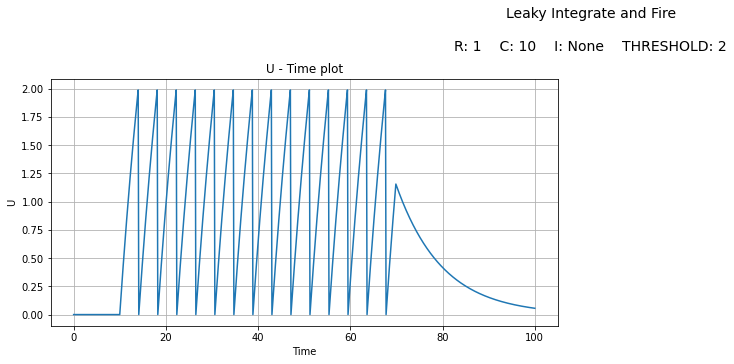

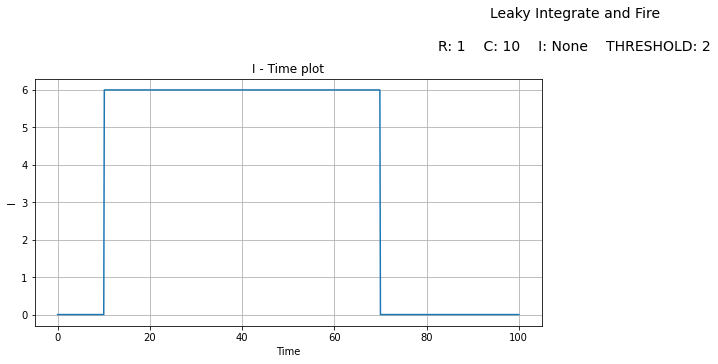

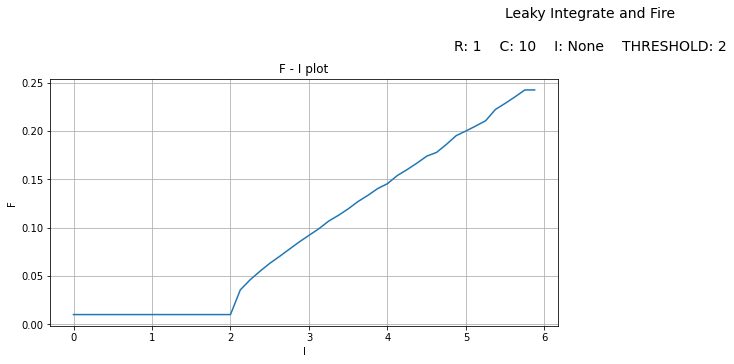

In [59]:
lif = LIF(currentFunc = intervalFunc , isLIF = True)
lif.plottingc(plotName = 'u-t')
lif.plottingc(plotName = 'i-t')
lif.plottingc(plotName = 'f-i')

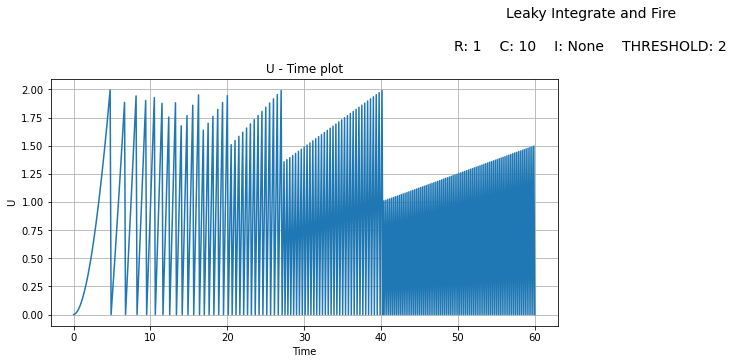

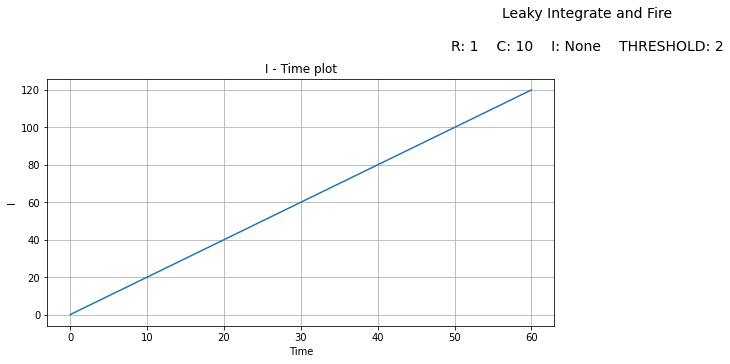

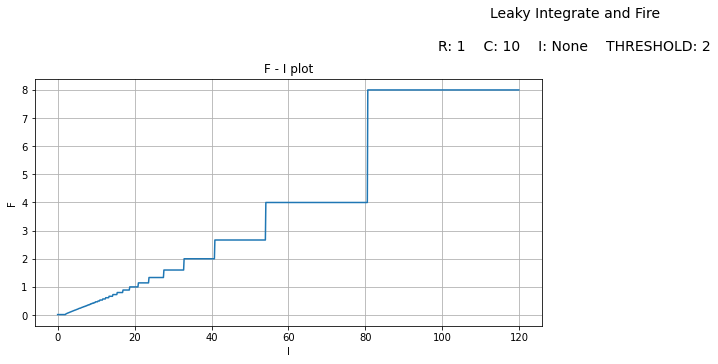

In [60]:
lif = LIF(isLIF = True , currentFunc = linearFunc , time = 60)
lif.plottingc(plotName = 'u-t')
lif.plottingc(plotName = 'i-t')
lif.plottingc(plotName = 'f-i')

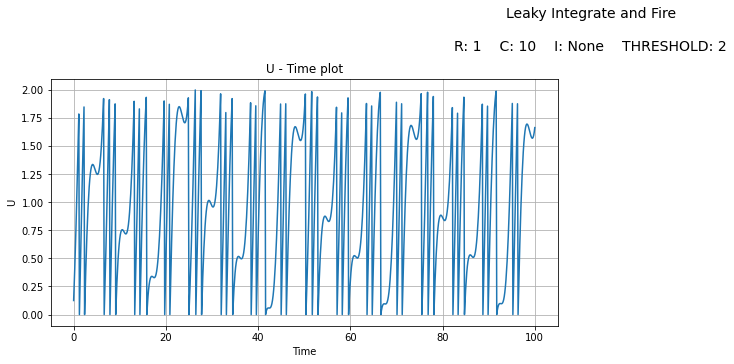

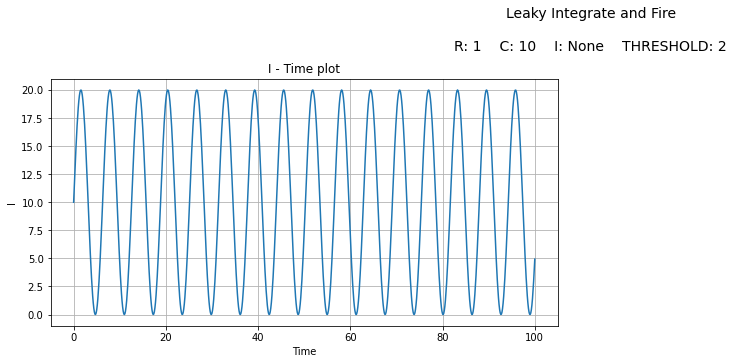

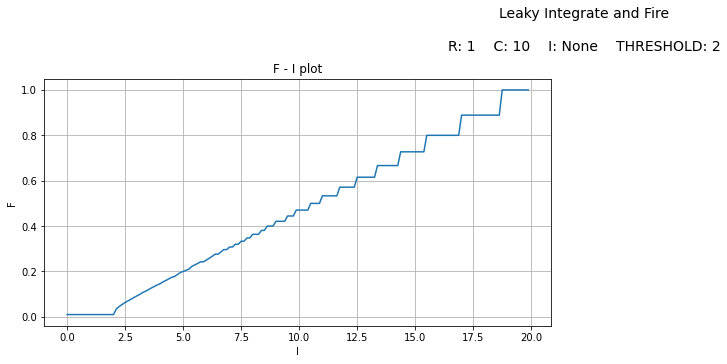

In [61]:
lif = LIF(isLIF = True , currentFunc = sineFunc)
lif.plottingc(plotName = 'u-t')
lif.plottingc(plotName = 'i-t')
lif.plottingc(plotName = 'f-i')

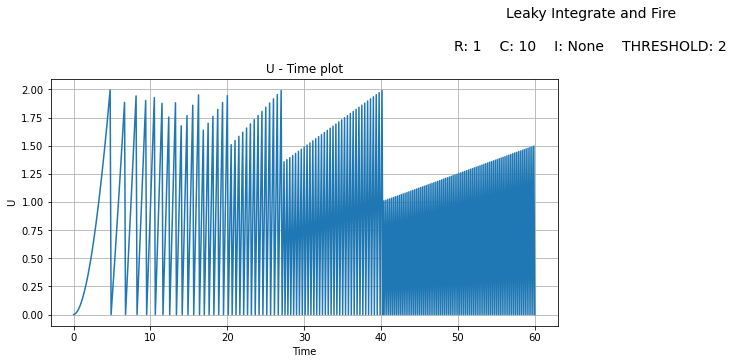

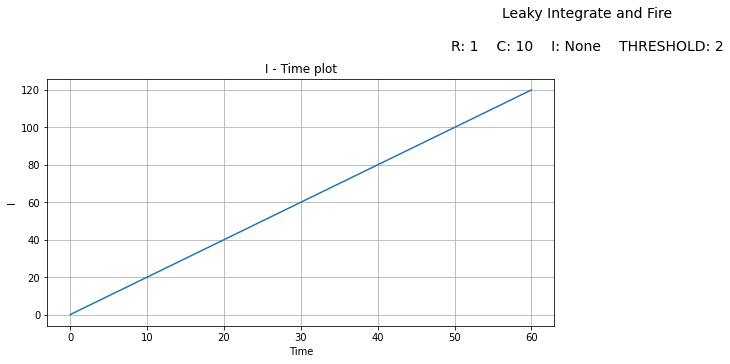

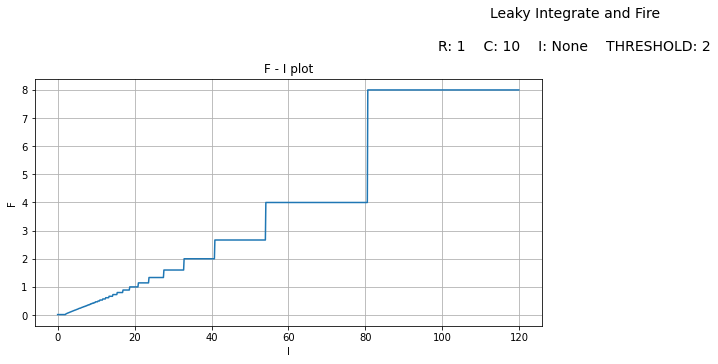

In [62]:
lif = LIF(isLIF = True , currentFunc = linearFunc , time = 60)
lif.plottingc(plotName = 'u-t')
lif.plottingc(plotName = 'i-t')
lif.plottingc(plotName = 'f-i')

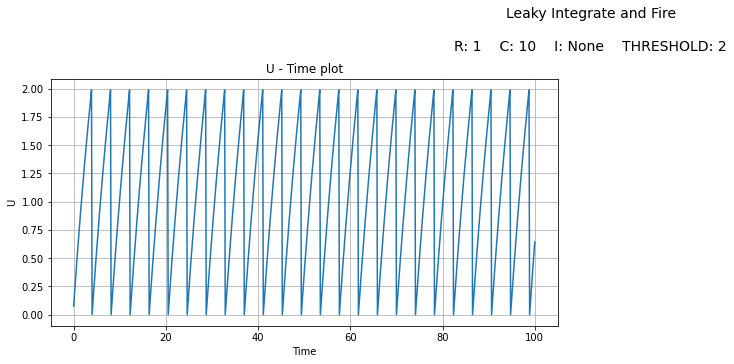

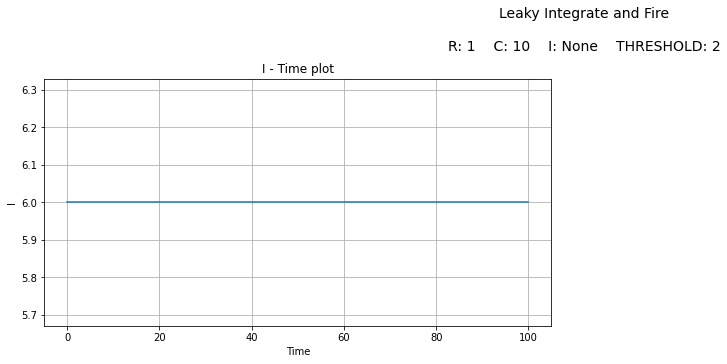

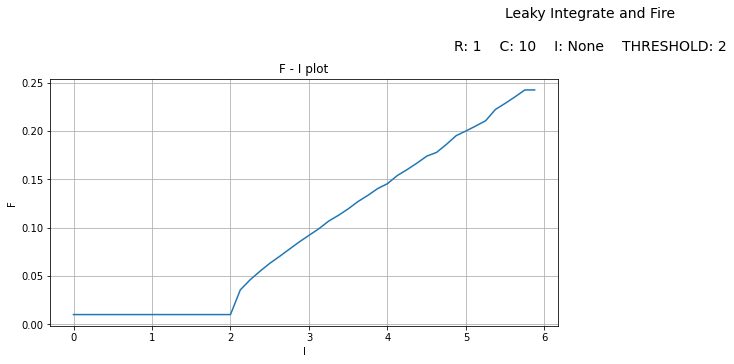

In [63]:
lif = LIF(isLIF = True , currentFunc = constantFunc)
lif.plottingc(plotName = 'u-t')
lif.plottingc(plotName = 'i-t')
lif.plottingc(plotName = 'f-i')

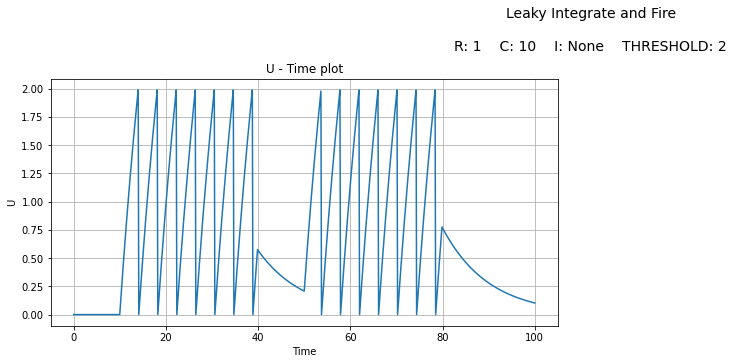

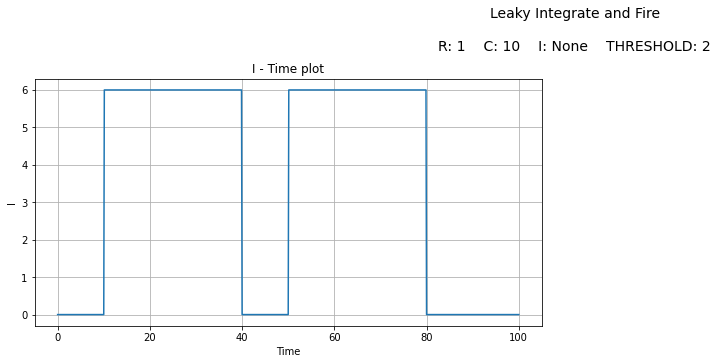

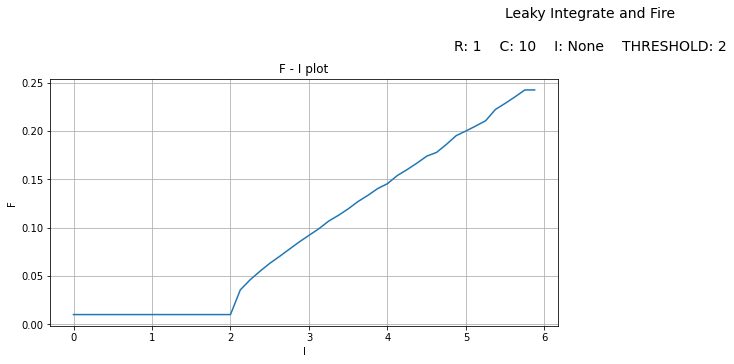

In [64]:
lif = LIF(isLIF = True , currentFunc = stepFunc)
lif.plottingc(plotName = 'u-t')
lif.plottingc(plotName = 'i-t')
lif.plottingc(plotName = 'f-i')

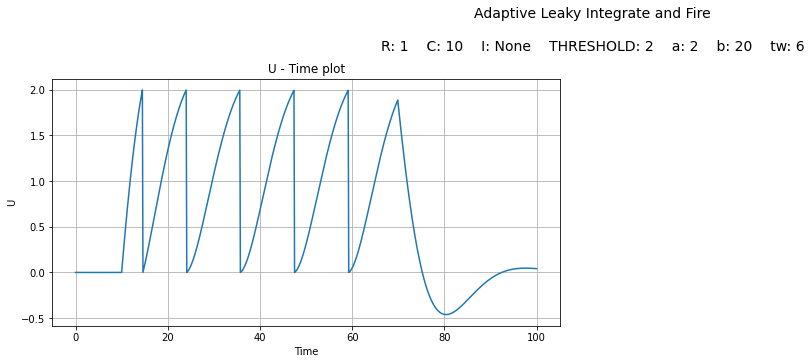

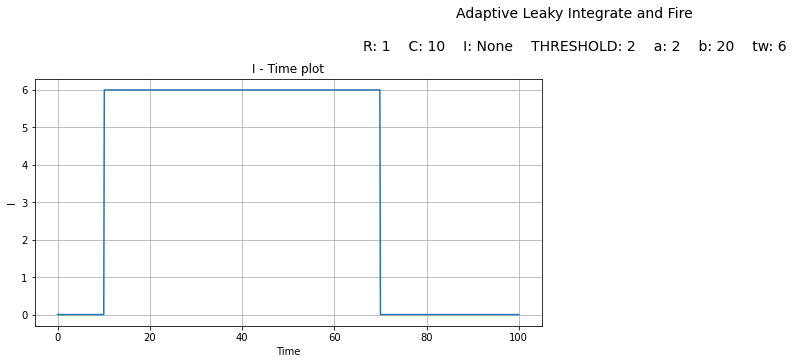

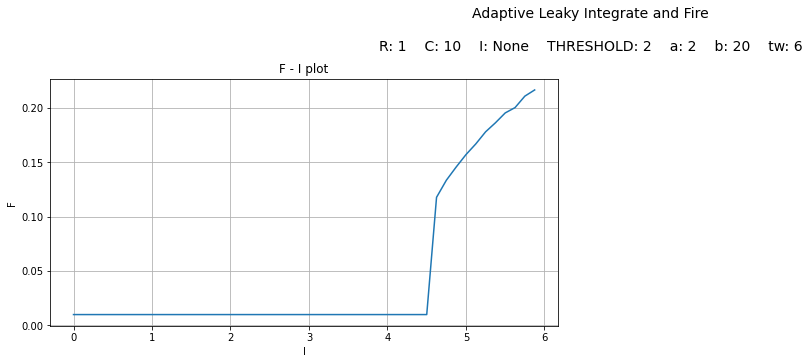

In [65]:
alif = LIF(isALIF = True , currentFunc = intervalFunc , b=20 , w_constant =6)
alif.plottingc(plotName = 'u-t')
alif.plottingc(plotName = 'i-t')
alif.plottingc(plotName = 'f-i')

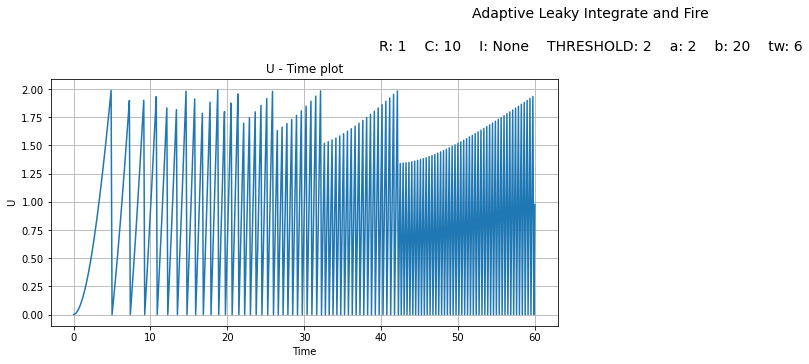

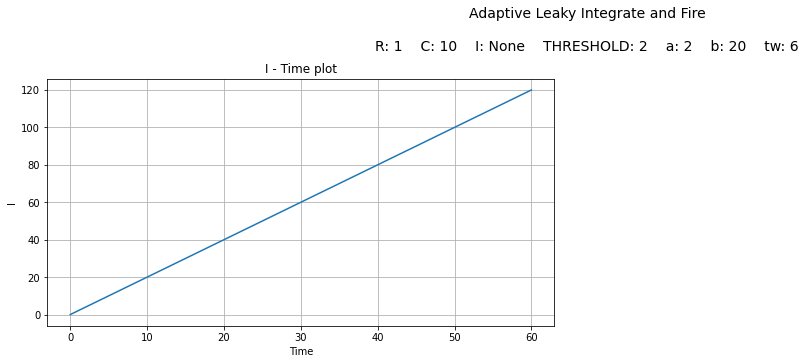

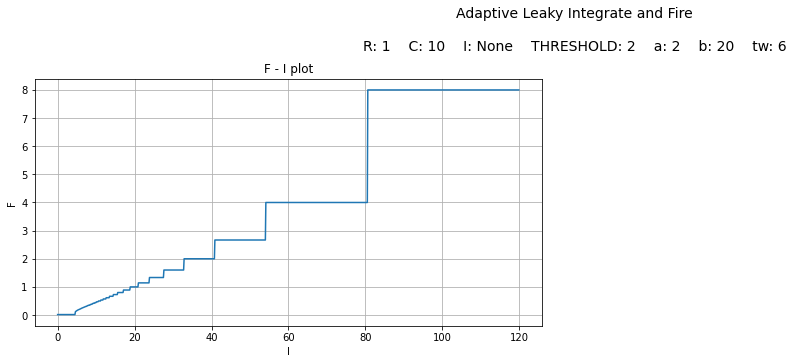

In [66]:
alif = LIF(isALIF = True , currentFunc = linearFunc , b=20 , w_constant =6 , time = 60)
alif.plottingc(plotName = 'u-t')
alif.plottingc(plotName = 'i-t')
alif.plottingc(plotName = 'f-i')

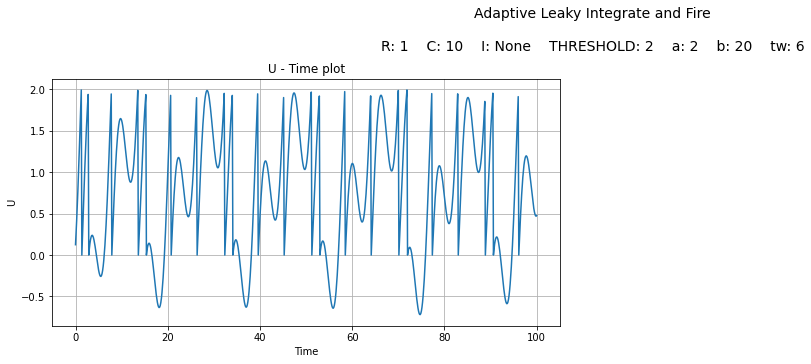

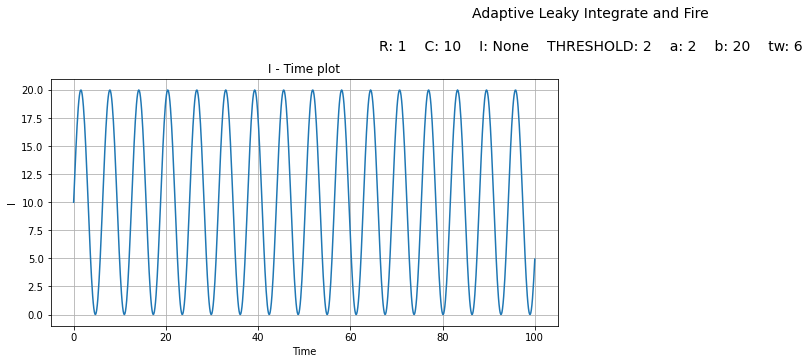

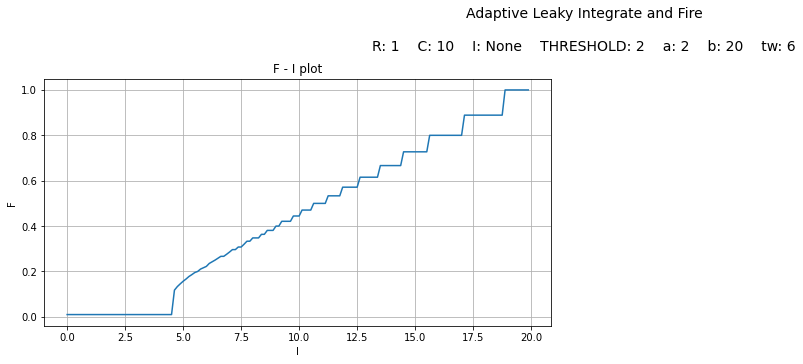

In [67]:
alif = LIF(isALIF = True , currentFunc = sineFunc , b=20 , w_constant =6)
alif.plottingc(plotName = 'u-t')
alif.plottingc(plotName = 'i-t')
alif.plottingc(plotName = 'f-i')

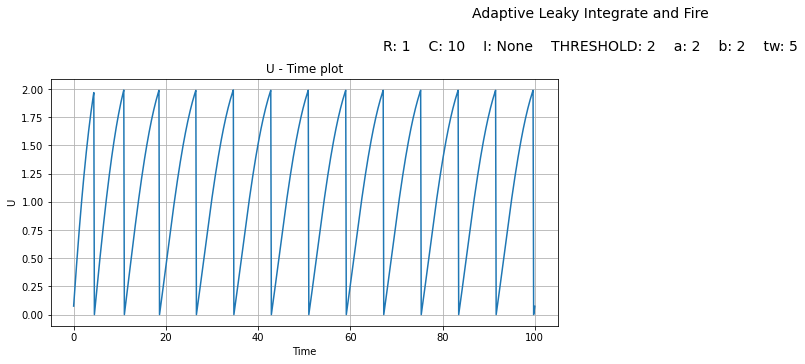

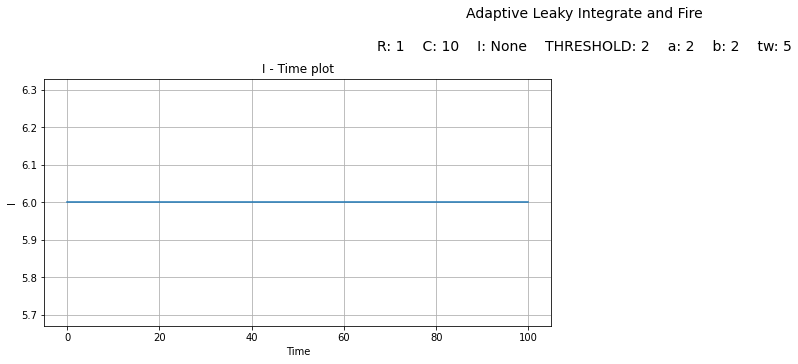

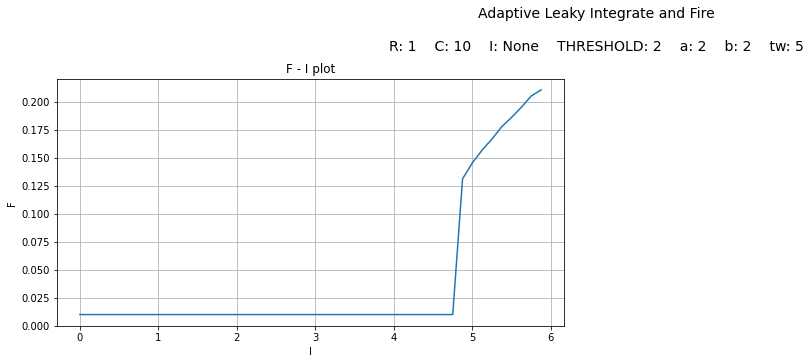

In [68]:
alif = LIF(isALIF = True , currentFunc = constantFunc)
alif.plottingc(plotName = 'u-t')
alif.plottingc(plotName = 'i-t')
alif.plottingc(plotName = 'f-i')

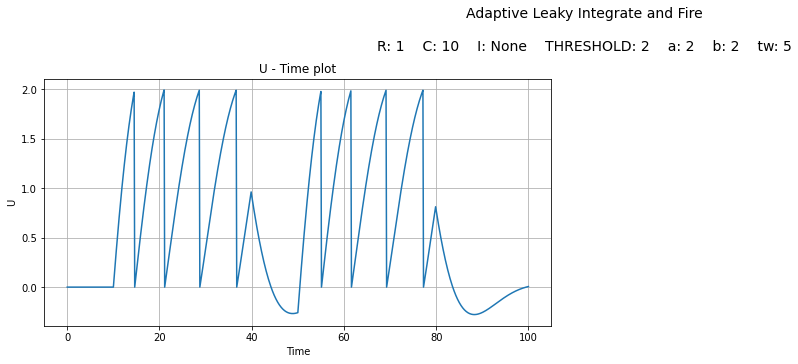

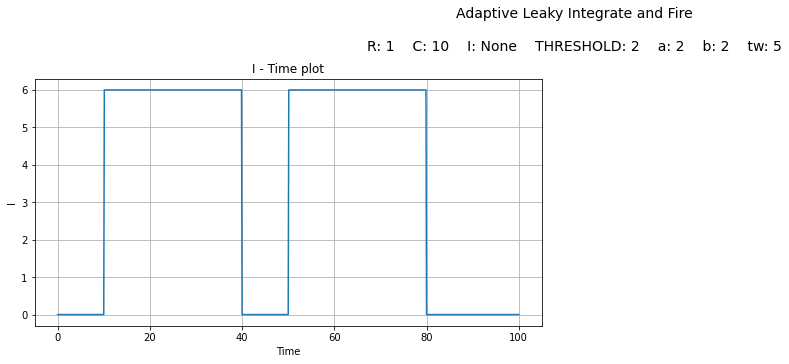

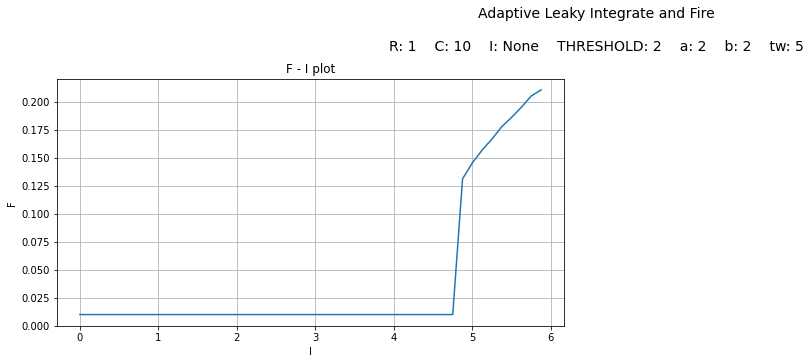

In [69]:
alif = LIF(isALIF = True , currentFunc = stepFunc)
alif.plottingc(plotName = 'u-t')
alif.plottingc(plotName = 'i-t')
alif.plottingc(plotName = 'f-i')

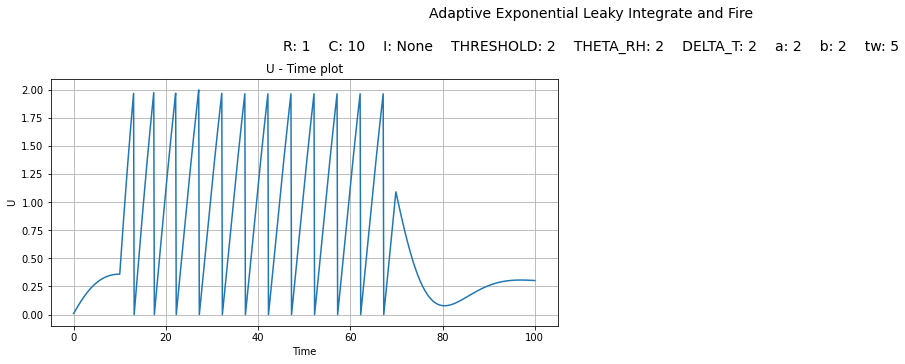

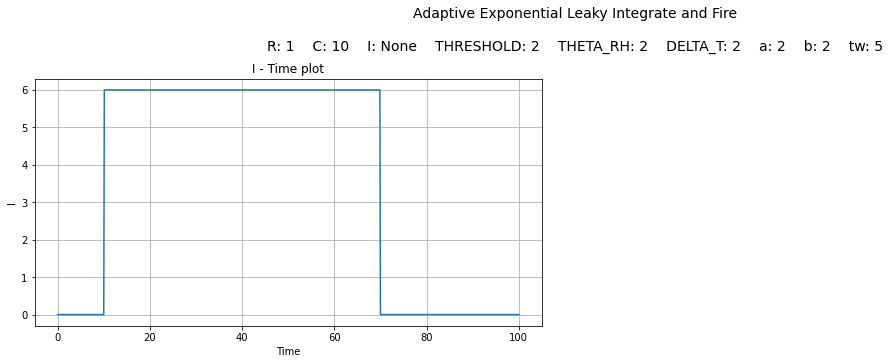

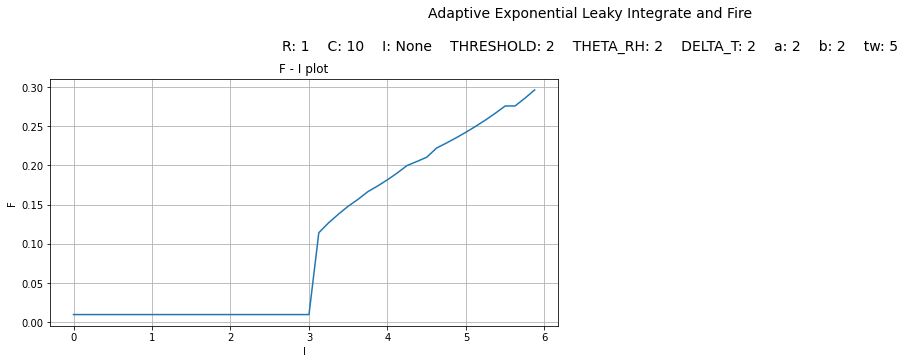

In [70]:
aelif = LIF(isAELIF = True , currentFunc = intervalFunc)
aelif.plottingc(plotName = 'u-t')
aelif.plottingc(plotName = 'i-t')
aelif.plottingc(plotName = 'f-i')

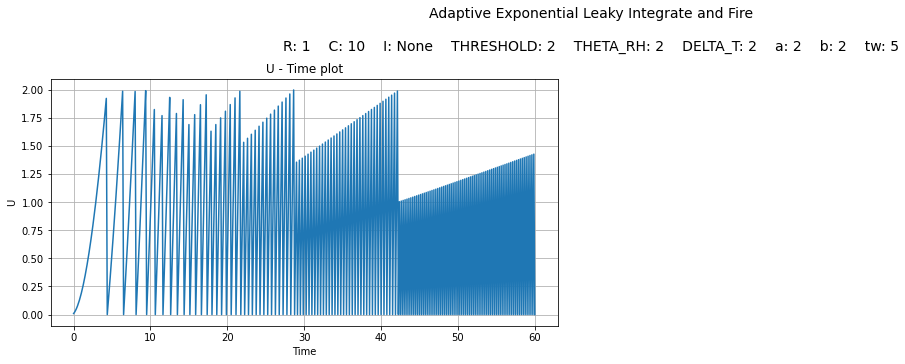

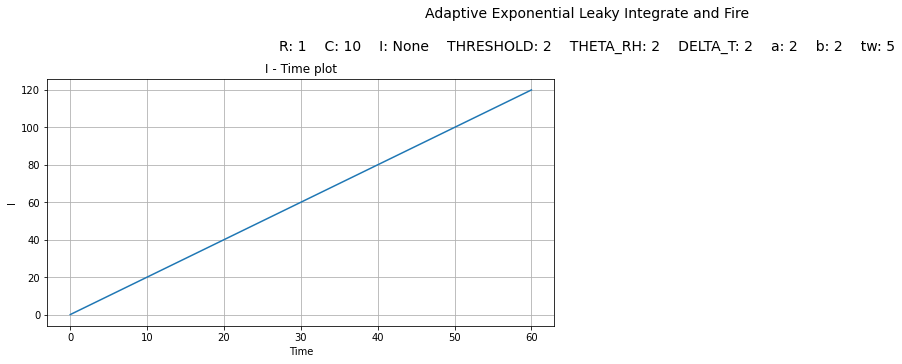

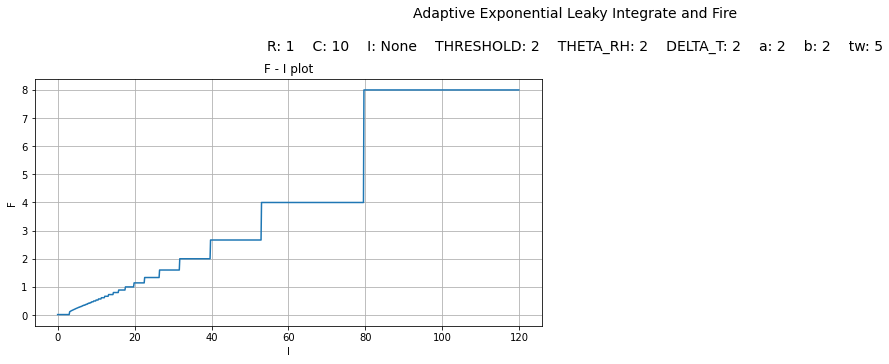

In [71]:
aelif = LIF(isAELIF = True , currentFunc = linearFunc , time = 60)
aelif.plottingc(plotName = 'u-t')
aelif.plottingc(plotName = 'i-t')
aelif.plottingc(plotName = 'f-i')

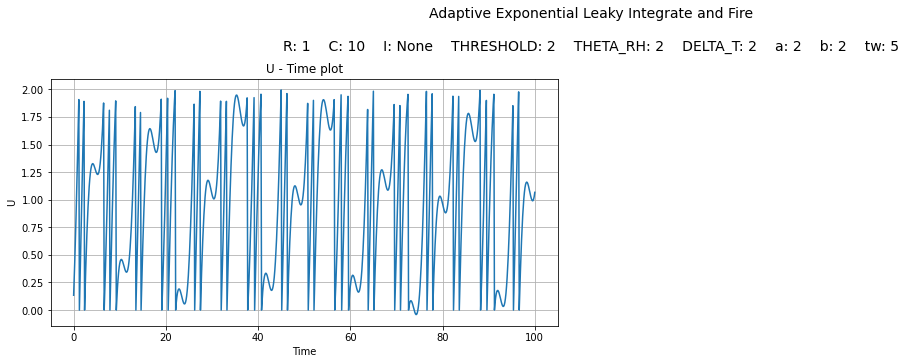

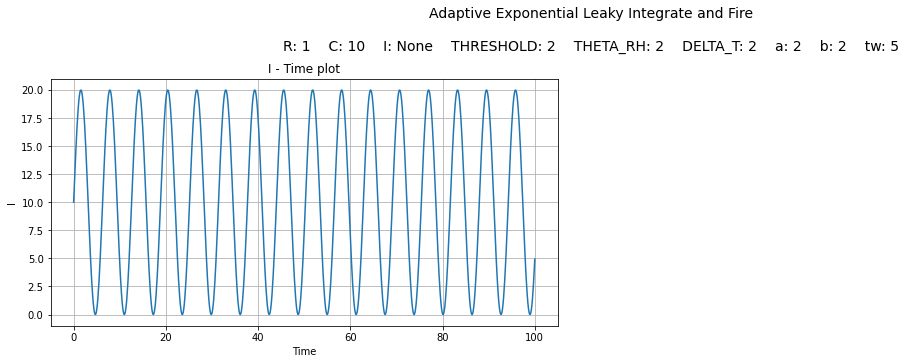

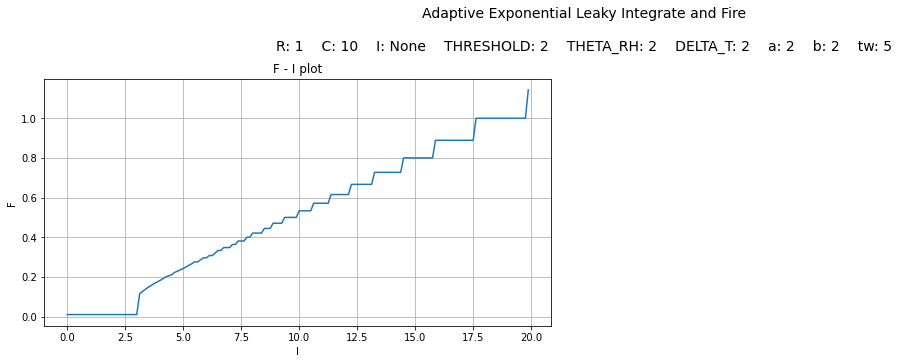

In [72]:
aelif = LIF(isAELIF = True , currentFunc = sineFunc)
aelif.plottingc(plotName = 'u-t')
aelif.plottingc(plotName = 'i-t')
aelif.plottingc(plotName = 'f-i')

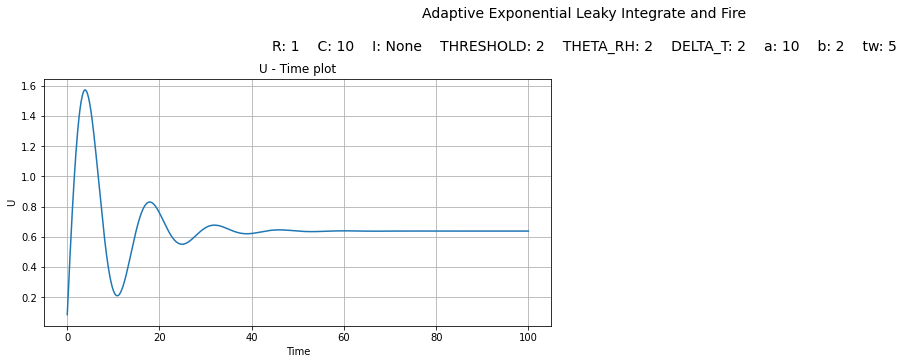

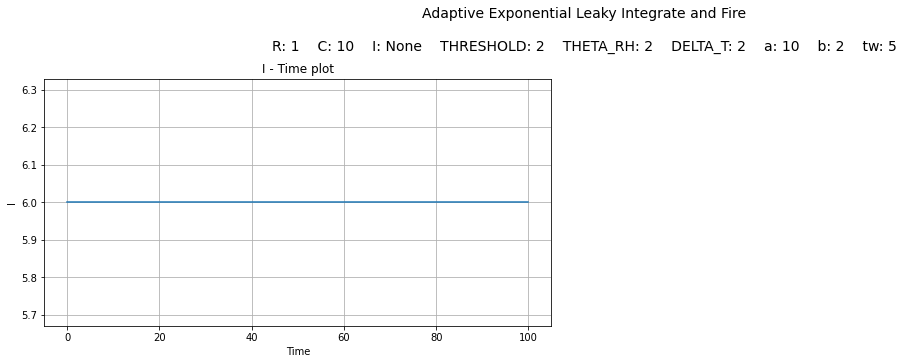

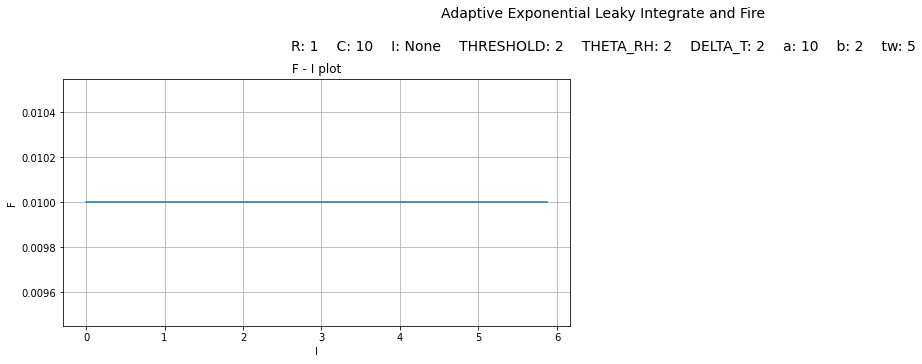

In [73]:
aelif = LIF(isAELIF = True , currentFunc = constantFunc , a=10)
aelif.plottingc(plotName = 'u-t')
aelif.plottingc(plotName = 'i-t')
aelif.plottingc(plotName = 'f-i')

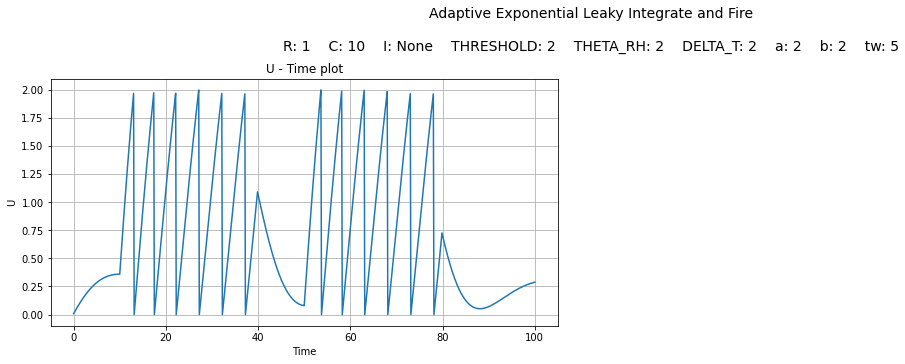

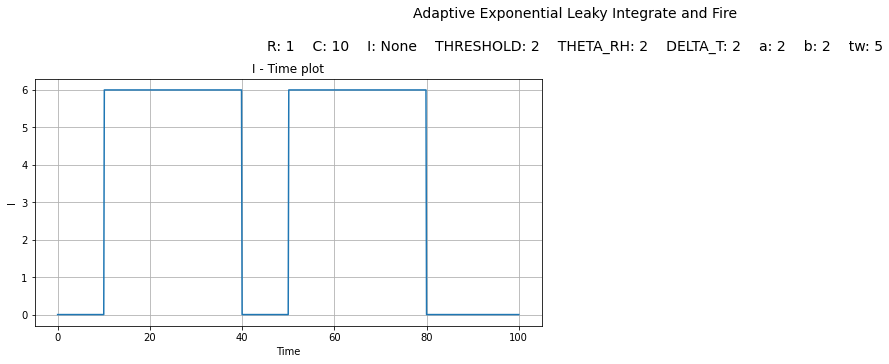

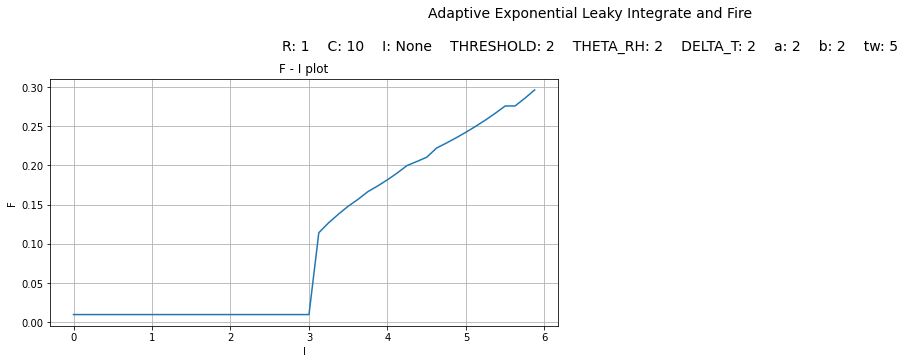

In [74]:
aelif = LIF(isAELIF = True , currentFunc = stepFunc)
aelif.plottingc(plotName = 'u-t')
aelif.plottingc(plotName = 'i-t')
aelif.plottingc(plotName = 'f-i')